Accuracy: 1.0


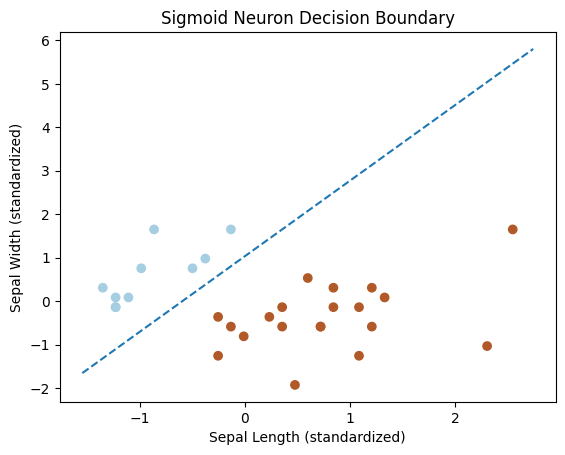

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w) + self.b

    def activation(self, x):
        return sigmoid(self.perceptron(x))

    def predict(self, X):
        return np.round(self.activation(X))

    def gradient_w(self, x, y):
        y_pred = self.activation(x)
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def gradient_b(self, x, y):
        y_pred = self.activation(x)
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):
        if initialize:
            self.w = np.random.randn(X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw = np.zeros(X.shape[1])
            db = 0
            for x, y in zip(X, Y):
                dw += self.gradient_w(x, y)
                db += self.gradient_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

model = SigmoidNeuron()
model.fit(X_train, y_train, epochs=1000, learning_rate=0.01)

y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]
plt.plot(x_vals, y_vals, '--')
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title("Sigmoid Neuron Decision Boundary")
plt.show()
